<a href="https://www.kaggle.com/code/prabhatxoplore/predictstudentscore-sgd-regressor?scriptVersionId=292749573" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import

In [576]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt

In [577]:
 df = pd.read_csv('/kaggle/input/playground-series-s6e1/train.csv',index_col=0)
test = pd.read_csv('/kaggle/input/playground-series-s6e1/test.csv',index_col=0)

# Analysis

In [578]:
df.isna().sum()

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [579]:
df.nunique()

age                   8
gender                3
course                7
study_hours         792
class_attendance    617
internet_access       2
sleep_hours          66
sleep_quality         3
study_method          5
facility_rating       3
exam_difficulty       3
exam_score          805
dtype: int64

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               630000 non-null  int64  
 1   gender            630000 non-null  object 
 2   course            630000 non-null  object 
 3   study_hours       630000 non-null  float64
 4   class_attendance  630000 non-null  float64
 5   internet_access   630000 non-null  object 
 6   sleep_hours       630000 non-null  float64
 7   sleep_quality     630000 non-null  object 
 8   study_method      630000 non-null  object 
 9   facility_rating   630000 non-null  object 
 10  exam_difficulty   630000 non-null  object 
 11  exam_score        630000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 62.5+ MB


In [581]:
df.groupby('gender')['exam_score'].mean()

gender
female    62.563220
male      62.175561
other     62.781191
Name: exam_score, dtype: float64

In [582]:
df_sample = df.sample(1000,random_state=42)

In [583]:
df_sample = df_sample.select_dtypes(include=['number'])

In [584]:
df_sample.head()

,age,study_hours,class_attendance,sleep_hours,exam_score
id,,,,,
364426,18,3.07,88.3,4.1,51.3
224752,21,3.28,49.6,7.0,50.6
110423,20,4.45,42.5,6.7,79.9
272555,21,4.19,82.8,5.7,55.4
199651,21,1.31,91.2,8.5,50.4


<Axes: >

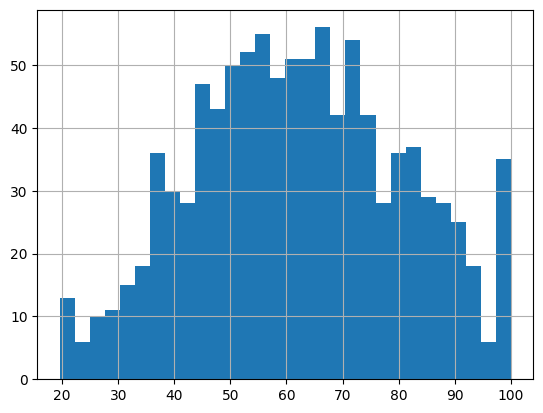

In [585]:
df_sample['exam_score'].hist(bins=30)

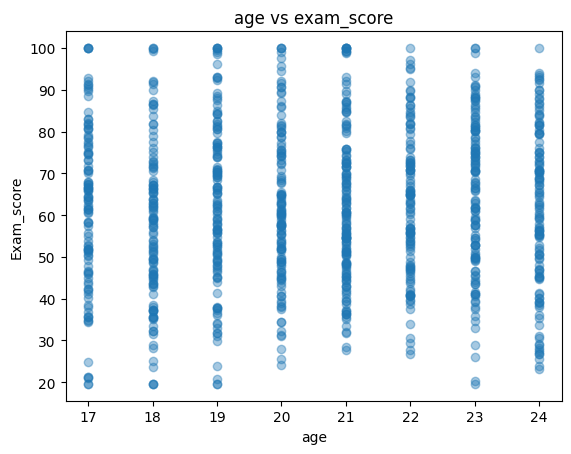

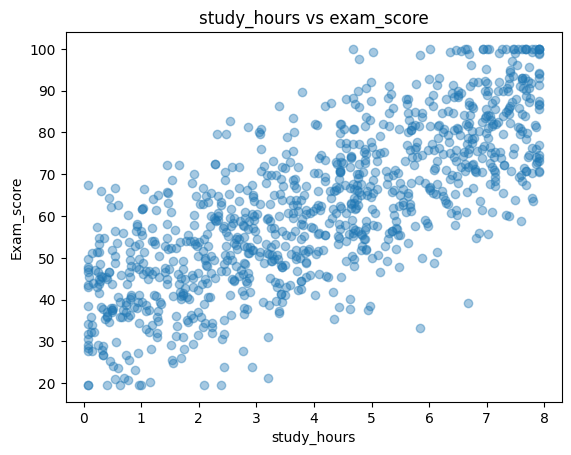

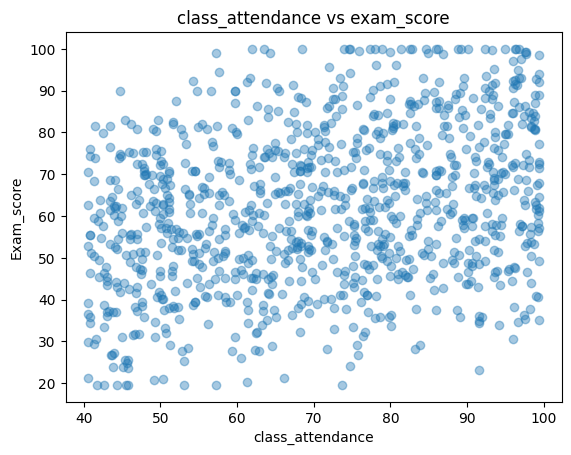

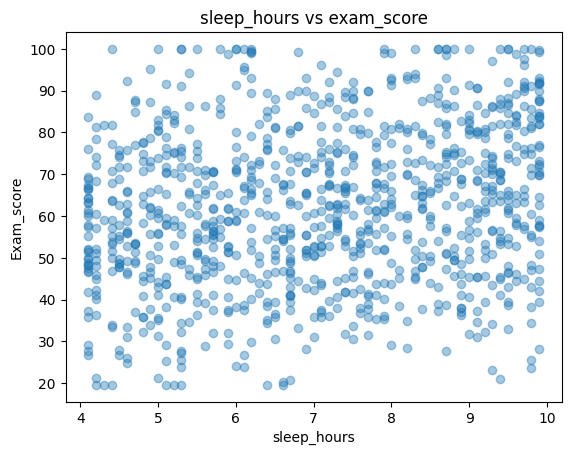

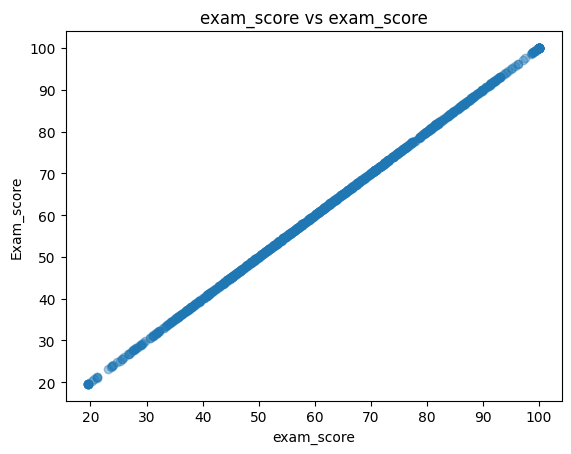

In [586]:
for col in df_sample:
    plt.scatter(x=df_sample[col],y=df_sample['exam_score'],alpha =0.4)
    plt.title(f'{col} vs exam_score')
    plt.xlabel(col)
    plt.ylabel('Exam_score')
    plt.show()
    print('\n')

In [587]:
df_sample.corr()['exam_score']

age                 0.046431
study_hours         0.760007
class_attendance    0.307803
sleep_hours         0.212893
exam_score          1.000000
Name: exam_score, dtype: float64

# Train test split data

In [588]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:11],df.iloc[:,11],test_size = 0.2,random_state=2)

In [589]:
X_train.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
id,,,,,,,,,,,
116777,18,other,b.sc,4.67,99.4,yes,4.4,good,online videos,medium,easy
537751,20,other,bca,0.21,59.2,yes,9.7,average,coaching,medium,moderate
378321,18,female,b.tech,3.37,99.4,yes,7.4,average,mixed,high,moderate
478825,21,female,b.sc,7.01,80.2,yes,5.6,poor,self-study,high,easy
576424,24,other,bca,7.04,93.3,yes,8.3,good,group study,high,easy


In [590]:
X_train.select_dtypes(include=['object']).columns.values

array(['gender', 'course', 'internet_access', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty'], dtype=object)

# Pipeline

In [591]:
scaler_ohe = ColumnTransformer([
    ('scale_std',StandardScaler(),[3,4,6]),
    
    ('encode_ohe',OneHotEncoder(drop='first',sparse_output=False),[1,2,5,7,8,9,10])
    
])

In [592]:
sgd = SGDRegressor(
    max_iter=1000,learning_rate='constant',eta0=0.00001
)

In [593]:
pipe = Pipeline([
    ('scaler_ohe',scaler_ohe),
    ('sgd',sgd)
])

In [594]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler_ohe',
                 ColumnTransformer(transformers=[('scale_std', StandardScaler(),
                                                  [3, 4, 6]),
                                                 ('encode_ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1, 2, 5, 7, 8, 9, 10])])),
                ('sgd', SGDRegressor(eta0=1e-05, learning_rate='constant'))])

In [595]:
print(pipe.named_steps['sgd'].intercept_)
print(pipe.named_steps['sgd'].coef_)

[71.72939176]
[13.38109227  5.43110329  2.28916699 -0.08888814  0.21141843 -0.07410764
  0.26567286  0.04863048  0.34786762  0.10874737  0.31330648  0.13003384
  4.26297855 -4.6443825  -7.18490672 -4.40457375 -8.24680315 -9.02324012
 -7.23428053 -3.55519354  0.03322964  0.05123643]


In [596]:
y_pred = pipe.predict(X_test)

In [597]:
r2_score(y_test,y_pred)

0.7773455989438187

In [598]:
root_mean_squared_error(y_test,y_pred)

8.900597021072956

In [602]:
y_pred = pipe.predict(test)

# Submission

In [603]:
submission = pd.DataFrame({
    'id':test.index.values,
    'exam_score':y_pred
})

In [604]:
submission.to_csv('submission.csv',index = False)